In [14]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Flatten


#Loading the Mnist dataset

In [15]:
mnist = tf.keras.datasets.mnist

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

**Normalizing data beetween 0 and 1**

In [17]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# Creating the neural network model


In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # 28x28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.9128
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1424 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0984 - accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0586 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0456 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0364 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.018

In [21]:
model.save('handwritten1_model')

In [23]:
m = tf.keras.models.load_model('handwritten1_model')

In [24]:
loss,accuracy = m.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9744
0.08991289883852005
0.974399983882904


In [25]:
import os

1/1 [==============================] - 0s 105ms/step
This digit is probably a 1


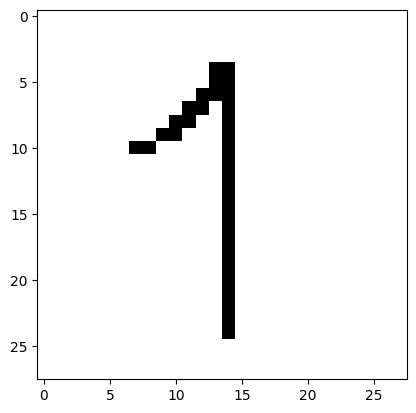

1/1 [==============================] - 0s 56ms/step
This digit is probably a 2


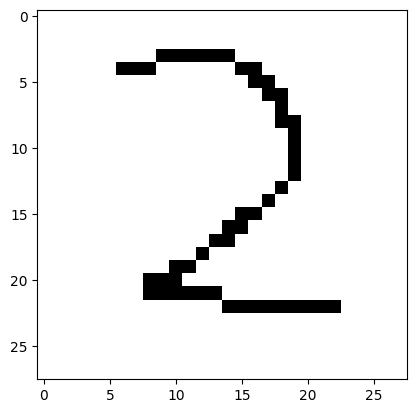

1/1 [==============================] - 0s 42ms/step
This digit is probably a 3


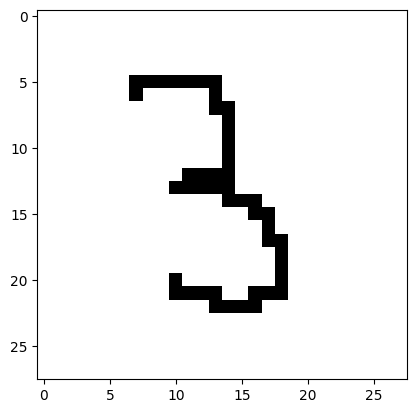

1/1 [==============================] - 0s 23ms/step
This digit is probably a 4


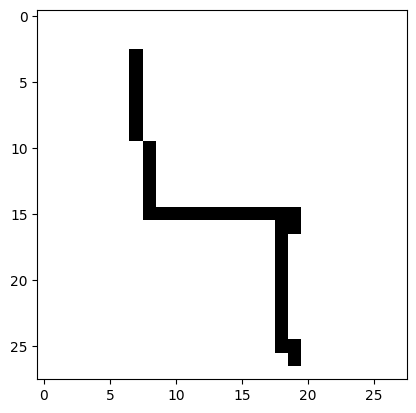

1/1 [==============================] - 0s 23ms/step
This digit is probably a 0


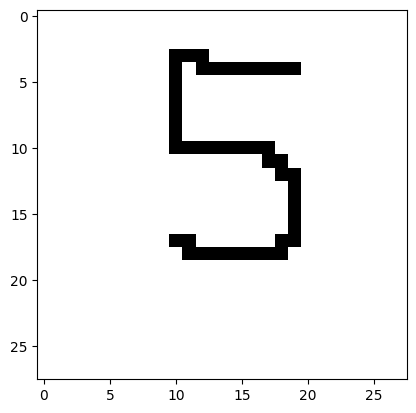

In [30]:
image_number = 1

while os.path.isfile(f'images/{image_number}.png'):
    try:
        # Read the image in grayscale
        img = cv2.imread(f'images/{image_number}.png', cv2.IMREAD_GRAYSCALE)

        # Invert the image
        img = np.invert(img)

        # Reshape the image to match the model's expected input shape
        img = img.reshape(1, 28, 28)

        # Normalize the pixel values to be between 0 and 1
        img = img / 255.0

        # Make a prediction
        prediction = model.predict(img)

        # Print the predicted digit
        predicted_digit = np.argmax(prediction)
        print(f'This digit is probably a {predicted_digit}')

        # Display the image
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f'Error processing image {image_number}: {str(e)}')

    finally:
        image_number += 1